Predicting Diagnosis Of Heart Disease Based On Age, Cholesterol, Blood Pressure Levels


Introduction:

Heart disease has been the leading cause of death in the United States since 1950. The term heart disease describes a range of conditions that could affect the heart. The most common heart diseases are coronary heart disease, peripheral artery disease, and aortic disease. Studies show that the leading risk factors for these diseases include high blood pressure and cholesterol. Specific medical conditions like unhealthy diets, physical inactivity, and smoking tend to put an individual at a higher risk. We aim to develop an accurate model to predict whether an individual has heart disease based on their cholesterol levels, heart rate and age. To approach this question, we will use three predictor values, heart rate, cholesterol levels, and age, from the heart data set containing 76 attributes. Hence, we would classify an individual as either positive or negative for Heart Disease.

In [44]:
library(tidyverse)
library(tidymodels)
library(repr)

In [45]:
url<- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

data <- read_csv(url, c("age", "sex", "cp", "blood_pressure", "cholesterol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))
data


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, blood_pressure, cholesterol, fbs, restecg, thalach, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,blood_pressure,cholesterol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


In [46]:
#checking for missing data
missing1 <- data |> 
summarize(ca) |>
filter(ca == "?")


missing2 <- data |> 
summarize(thal) |>
filter(thal == "?")

#tidying data
cleve_clean <- data |>
    mutate(diagnosis = ifelse(num >= 1, 1, 0), diagnosis = as.factor(diagnosis), sex = as.factor(sex), 
           cp = as.factor (cp), fbs= as.factor(fbs), restecg=as.factor(restecg), exang = as.factor(exang), 
           thal = as.factor(thal), ca = as.factor(ca), 
           slope = as.factor(slope)) |>
    select(-num)


#splitting data
cleve_split <- initial_split(cleve_clean, prop = 0.75, strata = diagnosis)

cleve_training <- training(cleve_split)
cleve_testing <- testing(cleve_split)


The predicted attribte is the "num" column which indicates the diagnosis of heart disease. According to the data description, a value of 0 represents presence of heart disease; any value that is not 0 represents no presense of heart disease. To change the predicted attribute to be catagorical, the ifelse function was used to convert any non-zero numbers to 1. The final result of the prediction is now either 0 (presence of heart disease) or 1 (no presence heart disease).


In [47]:
#summarizing data

summarize_all <- cleve_training |>
                    group_by(diagnosis) |>
                    summarize(age = mean(age),
                              blood_pressure = mean(blood_pressure),
                              cholesterol = mean(cholesterol),
                              thalach = mean(thalach),
                              oldpeak = mean(oldpeak),
                              patient_count = n())

summarize_all

diagnosis,age,blood_pressure,cholesterol,thalach,oldpeak,patient_count
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,52.33333,128.6911,241.4146,158.3902,0.604065,123
1,56.45192,135.5769,253.2308,138.2115,1.620192,104


Methods:

After we understand the dataset through exploratory data analysis and data preparation, we will aim to build diagnostic prediction models with a binary outcome. The heart disease database contains 76 attributes, however, the data set loaded for this project only includes 14 attributes. All of which, a single observation in the dataset represents an individual's health records, including their age, sex, chest pain type, resting blood pressure, cholesterol, fasting blood sugar, resting electrocardiography, max heart rate achieved, exercise, old peak, the slope of peak exercise, number of major vessels, and diagnosis status. Our models will only use three variables/columns: the person's age, cholesterol levels, and blood pressure. For our visualization, we will be using histograms to observe the distribution of different attributes. In our project, we will only plot the attributes relevant to our analysis: age, cholesterol, and blood pressure. Using histogram data makes it easy for us to identify that the three attributes are categorical, as if they were not, there would be significant gaps between each bar. Addtionally, we value the room for errors data by checking for missing data. The process revolves around inspecting each and single dataframe and check for non numerical values that do not fit into our goal of data analysis. This process can be complex as the data that we inspect do not measure missing data as "NA", but rather "?", such that the functions to detect NAs such as "is.na" could not be used. As such, the method used to filter for "?" in our data is to isolate each variable and look for "?". As a result, we found "?" in the "ca" and "thal" columns, which does not affect the variables that we are interested in.


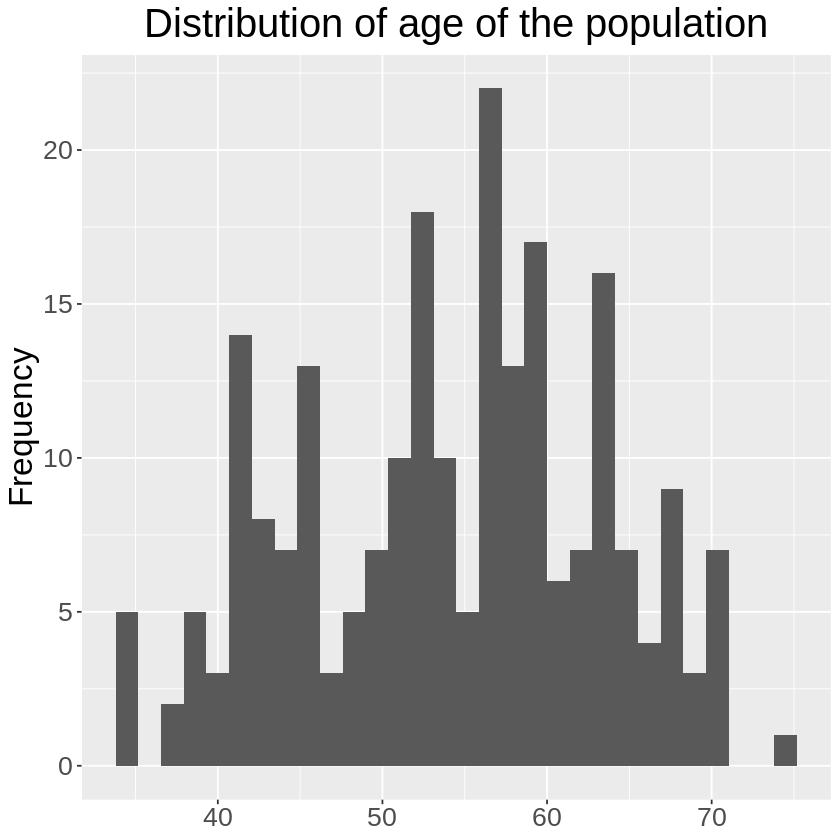

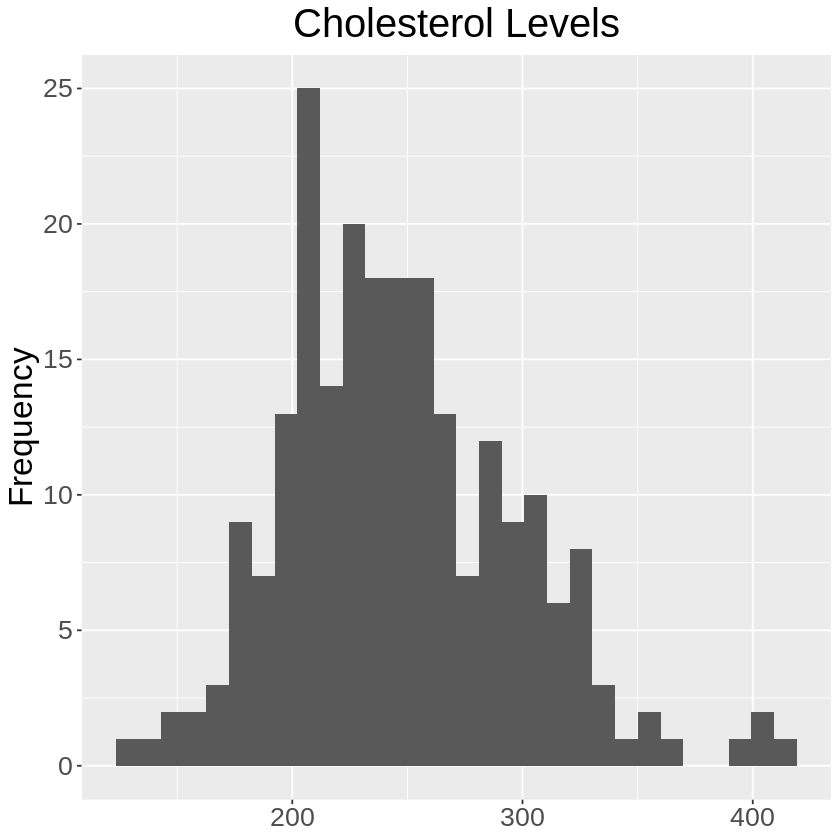

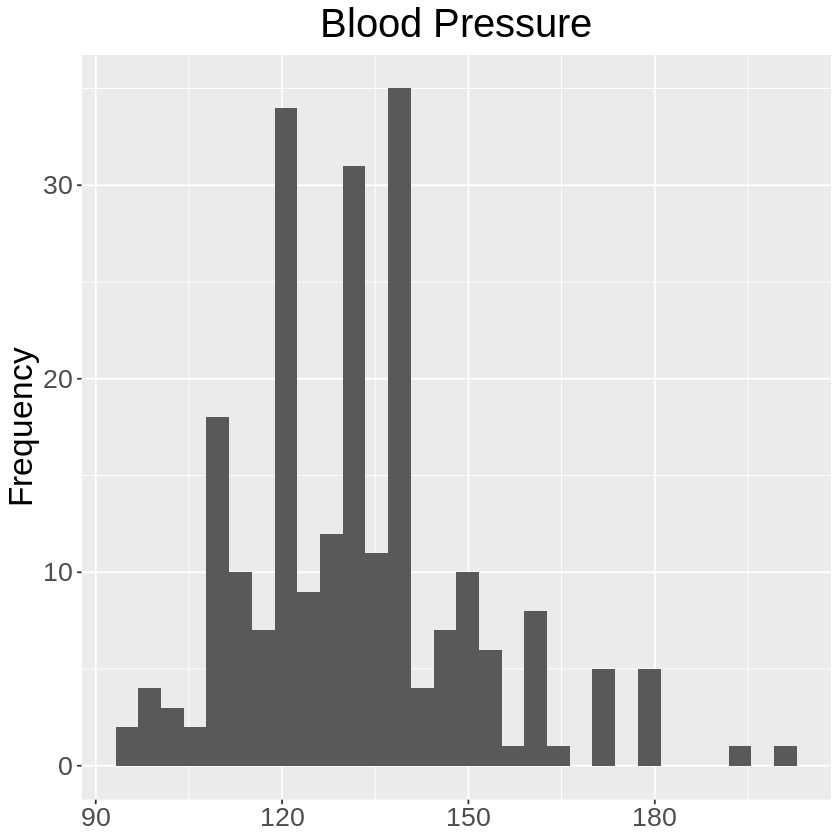

In [48]:
#visializing data

options(repr.plot.width = 7, repr.plot.height = 7)

age_plot <- ggplot(cleve_training, aes(x = age)) +
  geom_histogram(bins = 30) +
    labs(x = "Age", y = "Frequency") + 
    ggtitle("Distribution of age of the population") +
    theme(text = element_text(size = 20)) +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.title.x = element_blank()) 

chol_plot <- ggplot(cleve_training, aes(x = cholesterol)) +
    geom_histogram(bins = 30) + 
    labs(x = "Cholesterol Levels", y = "Frequency") + 
    ggtitle("Cholesterol Levels") +
    theme(text = element_text(size = 20)) +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.title.x = element_blank()) 

bp_plot <- ggplot(cleve_training, aes(x = blood_pressure)) +
    geom_histogram(bins = 30) +
    labs(x = "Blood Pressure", y = "Frequency") + 
    ggtitle("Blood Pressure") +
    theme(text = element_text(size = 20)) +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(axis.title.x = element_blank()) 

age_plot
chol_plot
bp_plot

Expected outcomes and significance:

We expect that patients with high cholesterol and blood pressure levels are more likely to have heart disease than those with lower levels. We believe that age will also significantly affect our results as health issues are more common in older adults. This increases the awareness for heart disease and may lead to future questions that explore how we may treat illnesses like these more effectively or even prevent them.

Bibliography: 

This project uses data from the Cleveland Clinic Foundation retreived from https://archive.ics.uci.edu/ml/datasets/Heart+Disease. 